#arXiv Dataset

This dataset is a mirror of the original ArXiv data. Because the full dataset is rather large (1.1TB and growing), this dataset provides only a metadata file in the json format. This file contains an entry for each paper, containing:

id: ArXiv ID (can be used to access the paper, see below)
submitter: Who submitted the paper
authors: Authors of the paper
title: Title of the paper
comments: Additional info, such as number of pages and figures
journal-ref: Information about the journal the paper was published in
doi: [https://www.doi.org](Digital Object Identifier)
abstract: The abstract of the paper
categories: Categories / tags in the ArXiv system
versions: A version history
You can access each paper directly on ArXiv using these links:

https://arxiv.org/abs/{id}: Page for this paper including its abstract and further links
https://arxiv.org/pdf/{id}: Direct link to download the PDF

##Loading and Unzipping the Dataset

In [1]:
!pip install kaggle

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d Cornell-University/arxiv -p /content/

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/Cornell-University/arxiv
License(s): CC0-1.0
100% 1.39G/1.39G [00:20<00:00, 71.0MB/s]
100% 1.39G/1.39G [00:20<00:00, 71.7MB/s]


In [2]:
!unzip /content/arxiv.zip

Archive:  /content/arxiv.zip
  inflating: arxiv-metadata-oai-snapshot.json  


In [18]:
import pandas as pd

file_path = "arxiv-metadata-oai-snapshot.json"

chunk_size = 1000000
df_chunk = pd.read_json(file_path, lines=True, chunksize=chunk_size)
df = next(df_chunk)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   id              1000000 non-null  float64
 1   submitter       999905 non-null   object 
 2   authors         1000000 non-null  object 
 3   title           1000000 non-null  object 
 4   comments        781384 non-null   object 
 5   journal-ref     390733 non-null   object 
 6   doi             550292 non-null   object 
 7   report-no       62234 non-null    object 
 8   categories      1000000 non-null  object 
 9   license         956777 non-null   object 
 10  abstract        1000000 non-null  object 
 11  versions        1000000 non-null  object 
 12  update_date     1000000 non-null  object 
 13  authors_parsed  1000000 non-null  object 
dtypes: float64(1), object(13)
memory usage: 106.8+ MB
None
         id           submitter  \
0  704.0001      Pavel Nadolsky   
1  704

##Data Preprocessing

In [19]:
df = df[['id', 'title', 'abstract', 'categories', 'update_date']]

df = df.dropna()

df['update_date'] = pd.to_datetime(df['update_date'], errors='coerce')
df['year'] = df['update_date'].dt.year

df.head()

,id,title,abstract,categories,update_date,year
0,704.0001,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...,hep-ph,2008-11-26,2008
1,704.0002,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,2008-12-13,2008
2,704.0003,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...,physics.gen-ph,2008-01-13,2008
3,704.0004,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...,math.CO,2007-05-23,2007
4,704.0005,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...,math.CA math.FA,2013-10-15,2013


In [20]:
import re

# Function to clean text (remove special characters, extra spaces)
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    return text.strip()

# Apply text cleaning to title and abstract
df['title'] = df['title'].apply(clean_text)
df['abstract'] = df['abstract'].apply(clean_text)

# Check cleaned data
df.head()

,id,title,abstract,categories,update_date,year
0,704.0001,calculation of prompt diphoton production cros...,a fully differential calculation in perturbati...,hep-ph,2008-11-26,2008
1,704.0002,sparsity certifying graph decompositions,we describe a new algorithm the k ell pebble g...,math.CO cs.CG,2008-12-13,2008
2,704.0003,the evolution of the earth moon system based o...,the evolution of earth moon system is describe...,physics.gen-ph,2008-01-13,2008
3,704.0004,a determinant of stirling cycle numbers counts...,we show that a determinant of stirling cycle n...,math.CO,2007-05-23,2007
4,704.0005,from dyadic lambda_ alpha to lambda_ alpha,in this paper we show how to compute the lambd...,math.CA math.FA,2013-10-15,2013


##Exploratory Data Analysis

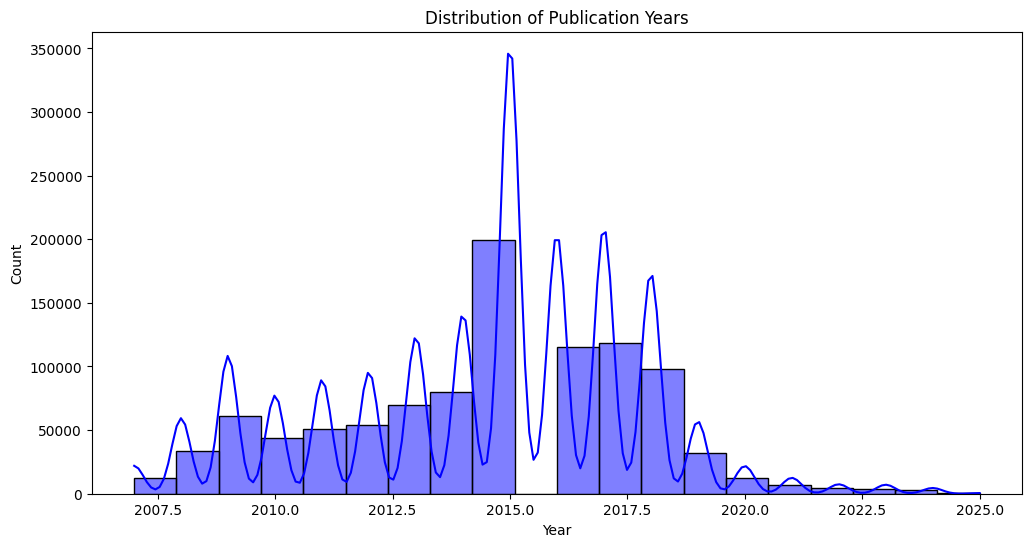

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['year'].dropna(), bins=20, kde=True, color='blue')
plt.title("Distribution of Publication Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

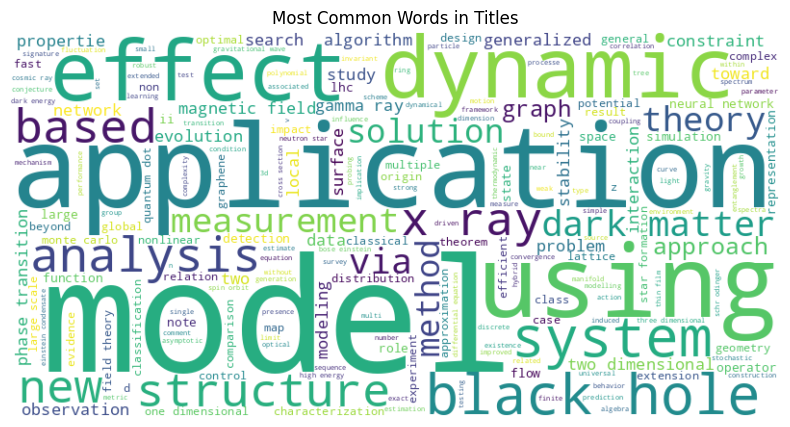

In [22]:
from wordcloud import WordCloud

text = " ".join(df['title'].dropna())  # Combine all titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Titles")
plt.show()

<ipython-input-23-ea66e2d084d9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


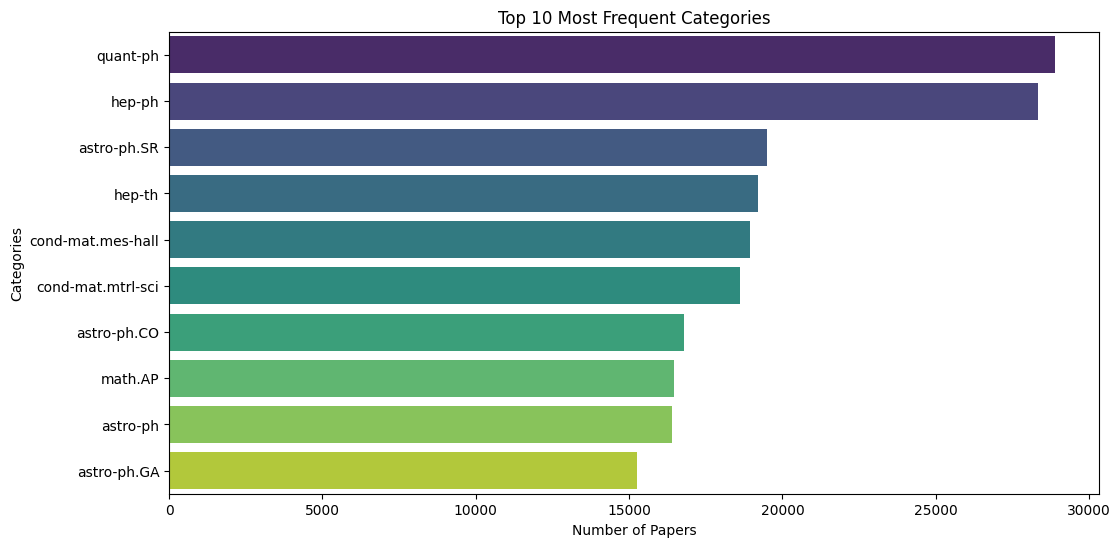

In [23]:
top_categories = df['categories'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')
plt.title("Top 10 Most Frequent Categories")
plt.xlabel("Number of Papers")
plt.ylabel("Categories")
plt.show()

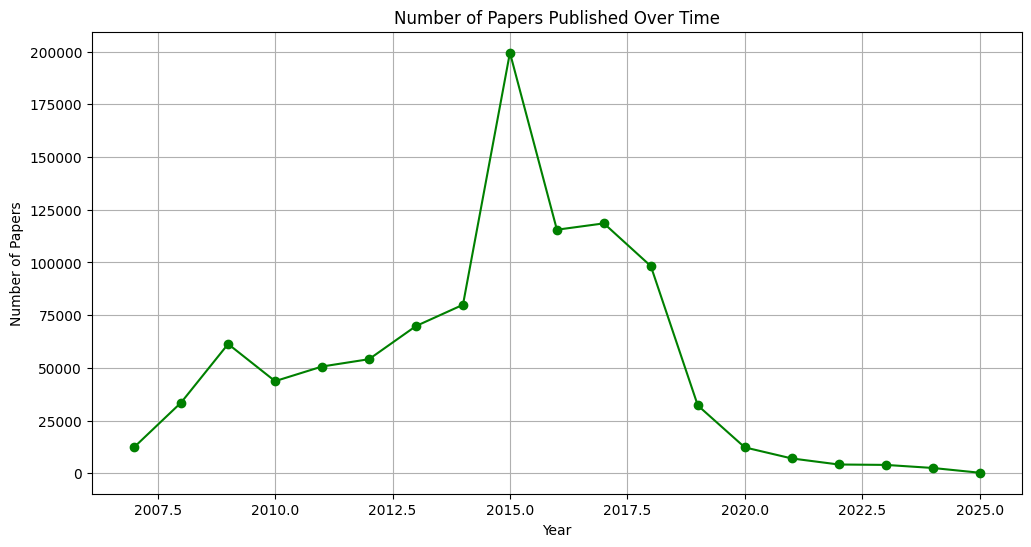

In [24]:
yearly_counts = df.groupby('year').size()

plt.figure(figsize=(12, 6))
plt.plot(yearly_counts, marker='o', linestyle='-', color='green')
plt.title("Number of Papers Published Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.grid(True)
plt.show()